In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
data_path = Path('../../uhf_hit_maps').resolve()

In [3]:
map_files = sorted(data_path.glob("hit_map_healpix_nside64_1*.npy"))

In [4]:
combined_map = np.zeros(hp.nside2npix(64))

In [5]:
for mf in map_files:
    m = np.load(mf)
    combined_map += m
np.save(data_path / "hit_map_healpix_nside64_good_blocks.npy", combined_map)

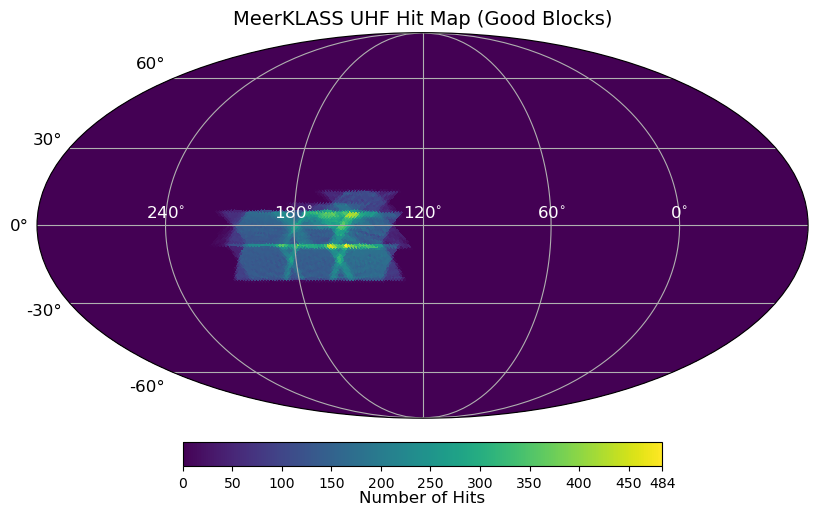

In [6]:
cbar_ticks = np.hstack((np.arange(0, 500, 50), [484]))
hp.projview(
    combined_map, rot=(120, 0), coord='C', unit='Number of Hits', flip='astro', 
    graticule=True, graticule_labels=True, longitude_grid_spacing=60,
    custom_xtick_labels=[f"{v}" + "$^{\circ}$" for v in [240, 180, 120, 60, 0]],
    xtick_label_color='white', 
    cbar_ticks=cbar_ticks, extend='neither',
    title='MeerKLASS UHF Hit Map (Good Blocks)'
)
plt.savefig('uhf_hit_map_good_blocks.png')